In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install ultralytics==8.0.28
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [3]:
from ultralytics import YOLO
from IPython.display import display, Image

In [19]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet
from roboflow import Roboflow
rf = Roboflow(api_key="Rx0od3Taf35NpfNZkc3D")
project = rf.workspace("proj-pgxao").project("mangotrees")
dataset = project.version(2).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.28, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to MangoTrees-2 in yolov8:: 100%|██████████| 584/584 [00:00<00:00, 1774.83it/s]


In [20]:
%cd {HOME}

!yolo task=detect mode=train model='/content/runs/detect/train2/weights/best.pt' data='/content/datasets/MangoTrees-2/data.yaml' epochs=100 imgsz=640

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/runs/detect/train2/weights/best.pt, data=/content/datasets/MangoTrees-2/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8

In [ ]:
from google.colab import files
files.download('/content/runs/segment/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
!ls {HOME}/runs/detect/train3/

args.yaml					     train_batch0.jpg
events.out.tfevents.1688902259.29367af6b0b6.15039.0  train_batch1.jpg
results.csv					     train_batch2.jpg
results.png					     weights


In [22]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=600)

/content


FileNotFoundError: ignored

/content


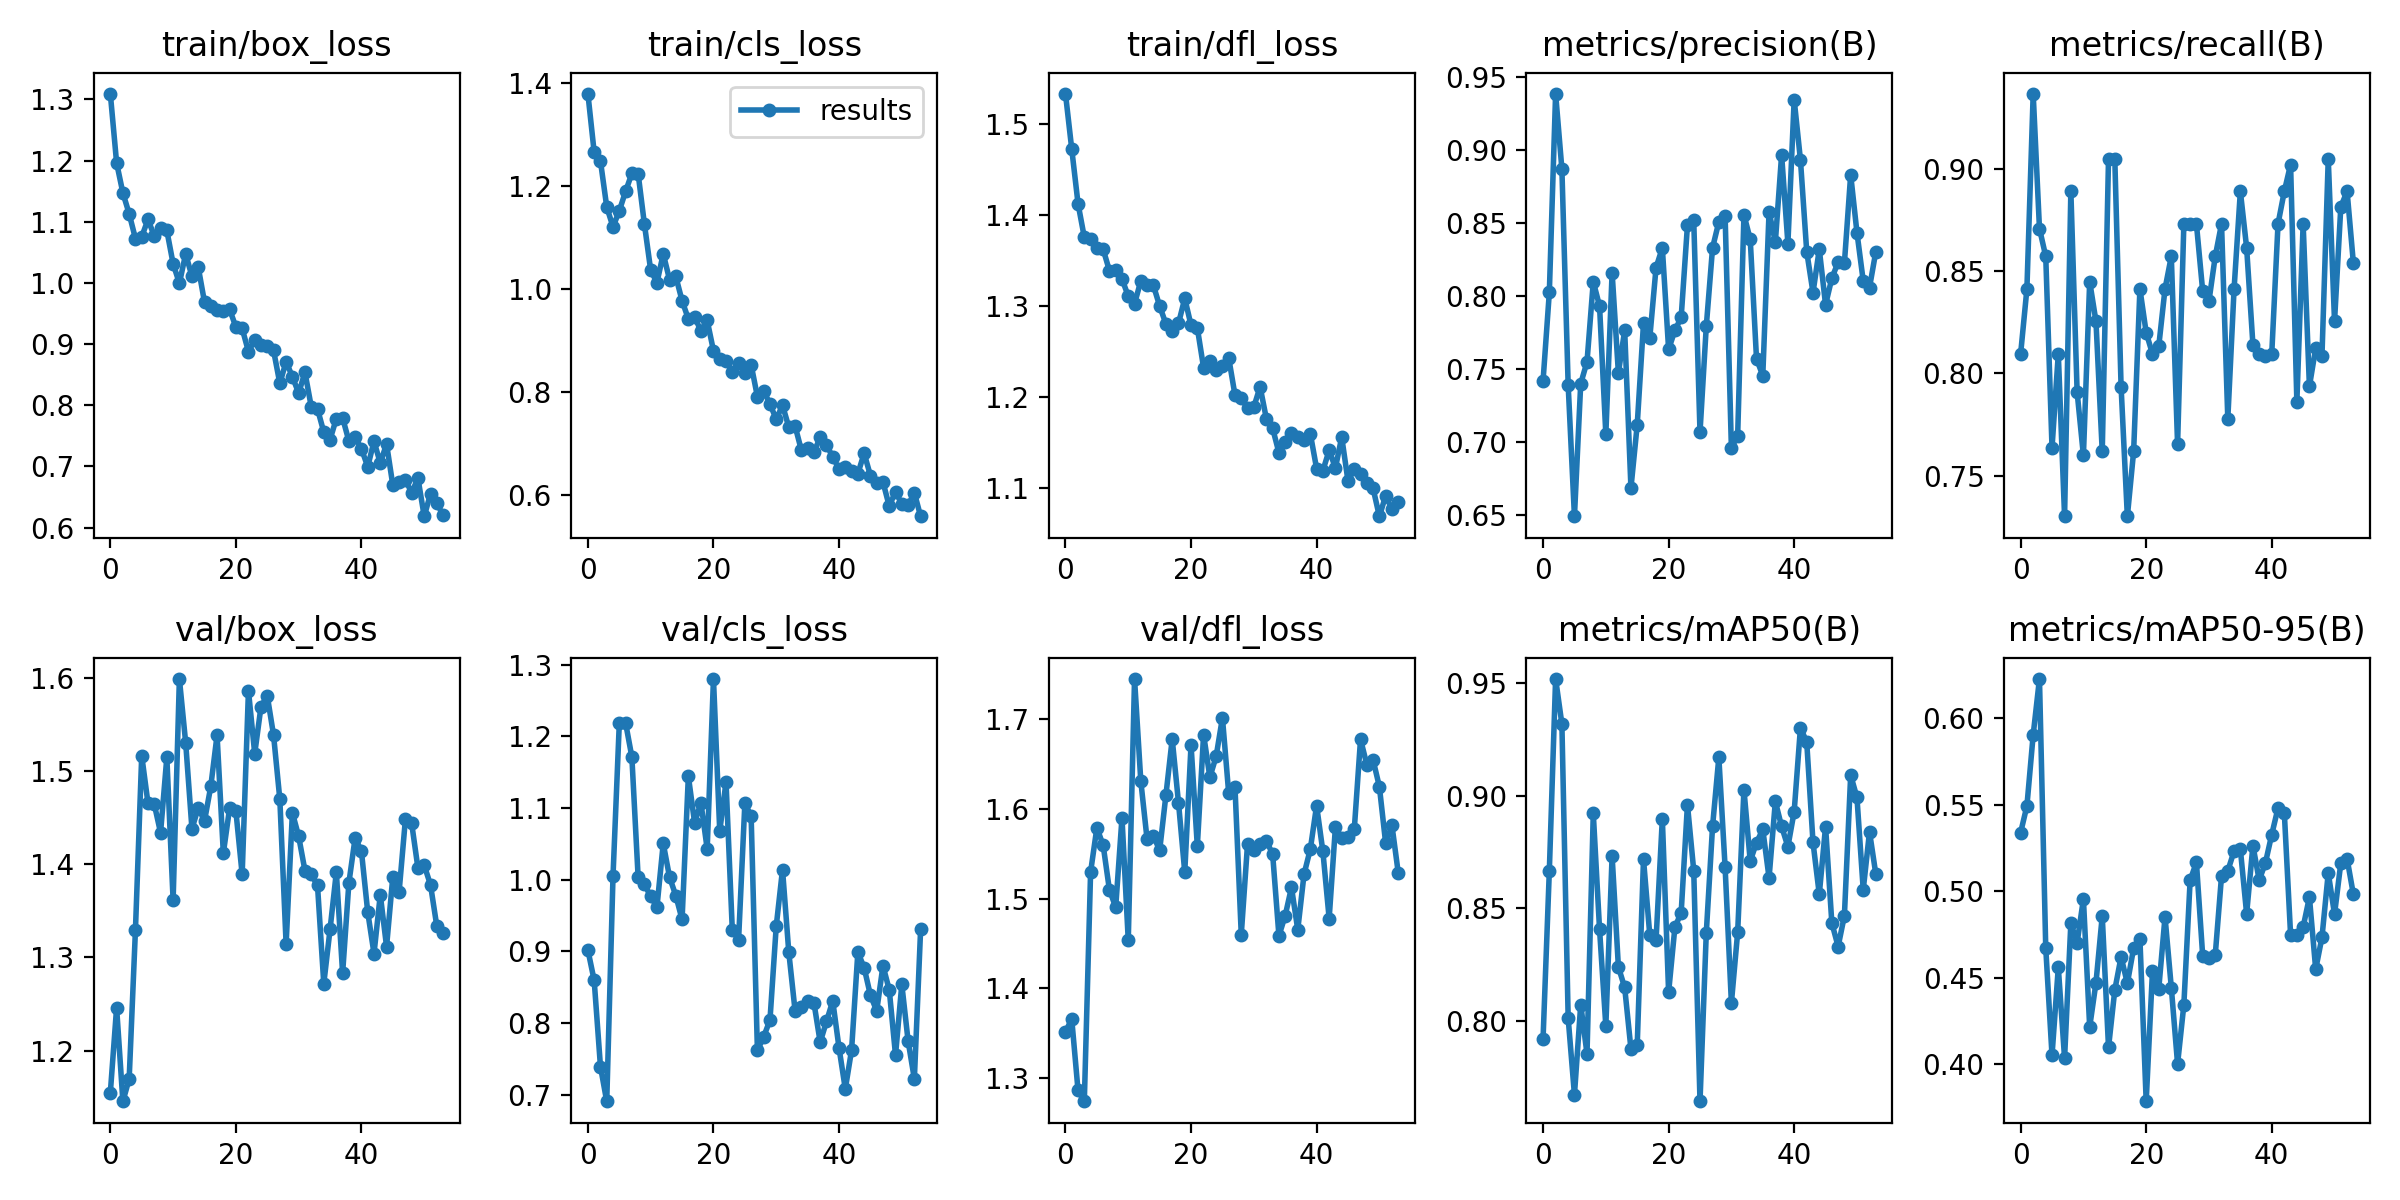

In [23]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

In [24]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=600)

/content


FileNotFoundError: ignored

In [25]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data="/content/datasets/MangoTrees-2/data.yaml"

/content
2023-07-09 11:47:30.473848: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-09 11:47:31.714770: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/MangoTrees-2/valid/labels.cache... 27 images, 0 backgrounds, 0 corrupt: 100% 27/27 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.25it/s]
                   all         27         63      0.887      0.871      0.932      0.621
Speed: 0.2ms pre-process, 25.5ms inference

In [26]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source='/content/datasets/MangoTrees-2/test/images' save=true

/content
2023-07-09 11:47:45.004812: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-09 11:47:46.002520: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/7 /content/datasets/MangoTrees-2/test/images/20230709_155312_jpg.rf.068e58e3a35f4ee8e62e762556c9f2a4.jpg: 640x640 5 Trees, 36.9ms
image 2/7 /content/datasets/MangoTrees-2/test/images/20230709_155312_jpg.rf.20c7318a3d3396cacb3e210d66d306b2.jpg: 640x640 2 Trees, 37.0ms
image 3/7 /content/datasets/MangoTrees-2/test/images/20230709_155404_jpg.rf.63dcf86b1a9b2d0986ce7ae9397b45eb.j

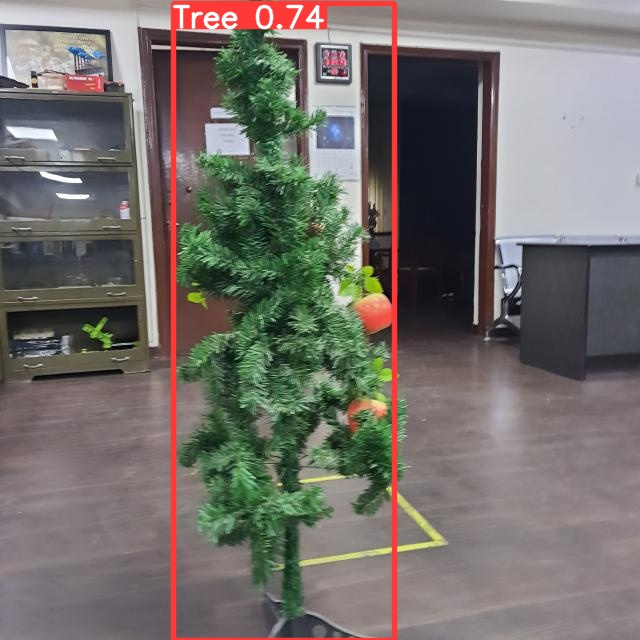

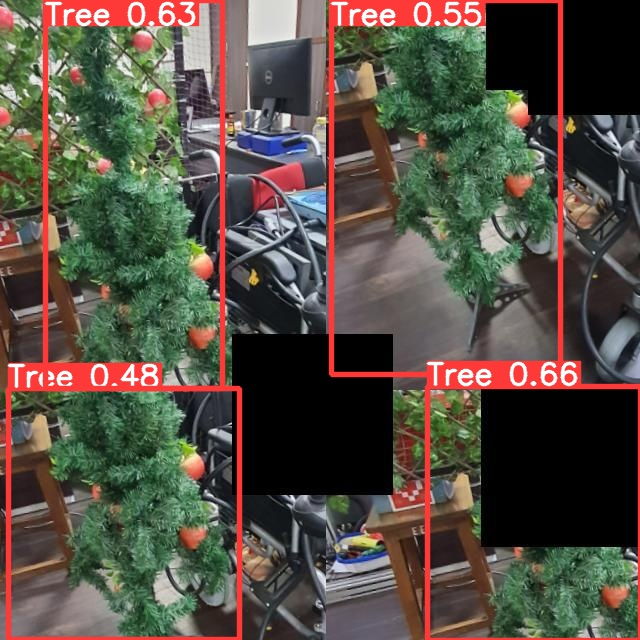

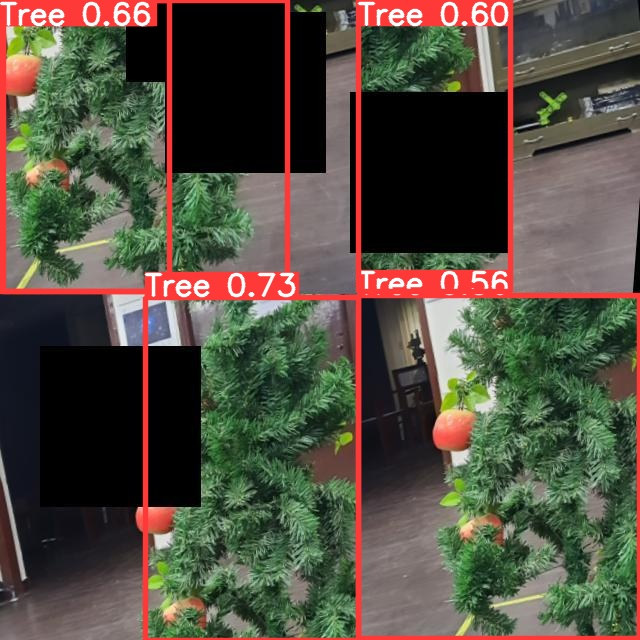

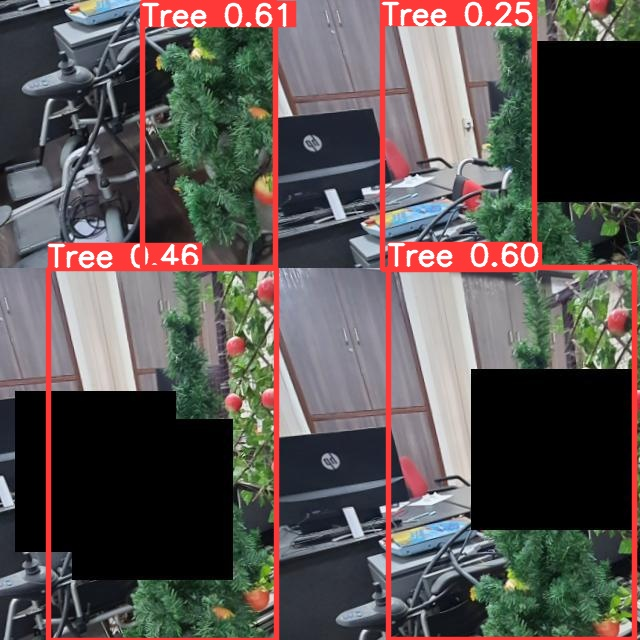

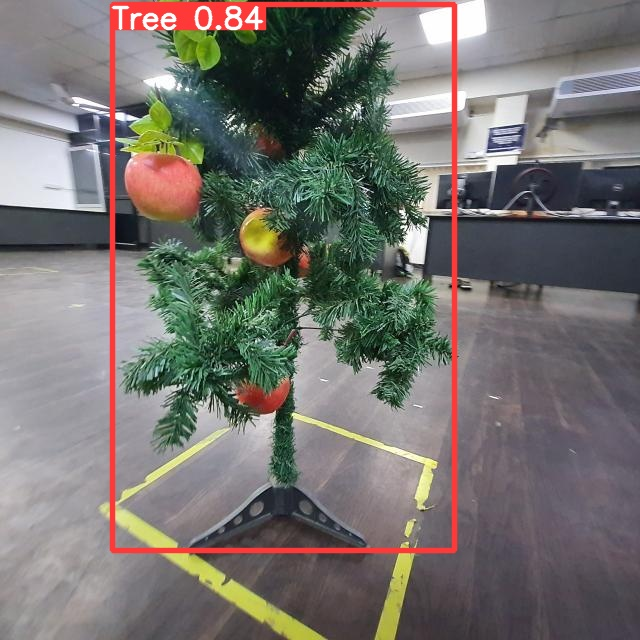

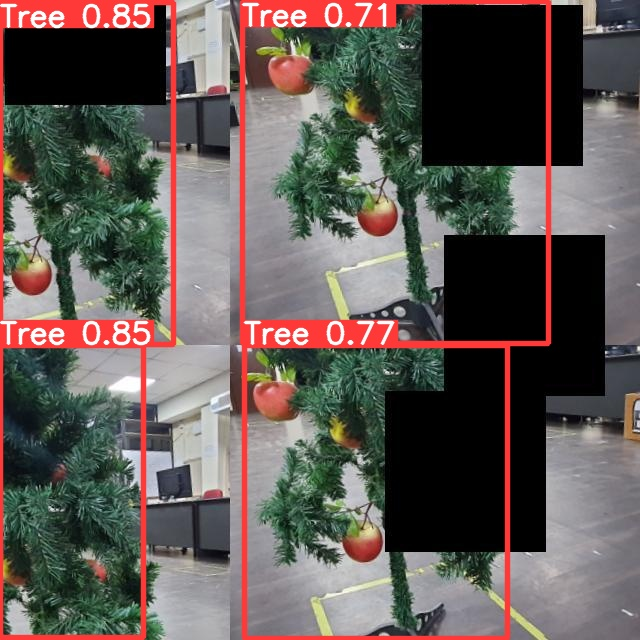

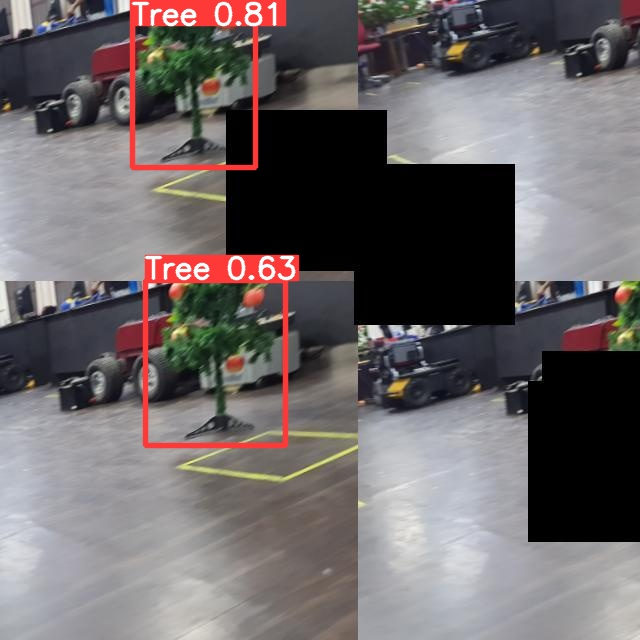

In [27]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")